<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/3week_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
import numpy as np

In [6]:
train_data = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1],
                       [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0,1, 0, 0]], dtype = np.float32)

train_data.shape

(8, 4)

In [7]:
train_data = train_data.reshape(2, 4, 4)

In [12]:
rnn = SimpleRNN(3, return_sequences = False, return_state = True)
state =  rnn(train_data)

In [14]:
rnn = SimpleRNN(3, return_sequences = False, return_state = True)
state, last_state = rnn(train_data)

In [15]:
rnn = SimpleRNN(3, return_sequences = True)
state = rnn(train_data)

In [16]:
rnn = SimpleRNN(3, return_sequences = True, return_state = True)
state, last_state = rnn(train_data)

In [17]:
print(f"hidden state : {state}, shape : {state.shape}")
print(f"last state : {last_state}, shape : {last_state.shape}")

hidden state : [[[-0.0629425   0.22346567 -0.6448969 ]
  [ 0.26725537 -0.8828807  -0.29872063]
  [ 0.6073714   0.20670286  0.6485754 ]
  [ 0.855516    0.2828538   0.5141009 ]]

 [[-0.0629425   0.22346567 -0.6448969 ]
  [ 0.5277726  -0.75587606  0.4151337 ]
  [ 0.7679059   0.72067803  0.5932126 ]
  [ 0.84836096 -0.19763002 -0.5593294 ]]], shape : (2, 4, 3)
last state : [[ 0.855516    0.2828538   0.5141009 ]
 [ 0.84836096 -0.19763002 -0.5593294 ]], shape : (2, 3)


In [18]:
inputs = Input(shape = (4, 4))

output, state = SimpleRNN(3, return_sequences = True, return_state = True)(inputs)
model = Model(inputs = inputs, outputs = [output, state])

In [19]:
output, state = model.predict(train_data)

In [20]:
model.layers[1].weights[0]

<tf.Variable 'simple_rnn_6/simple_rnn_cell_8/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.19349056,  0.14102542, -0.00384051],
       [-0.42814422, -0.5692617 ,  0.3920462 ],
       [ 0.2105825 ,  0.694139  , -0.87306166],
       [-0.8977904 ,  0.16753674, -0.39874524]], dtype=float32)>

In [21]:
model.layers[1].weights[1]

<tf.Variable 'simple_rnn_6/simple_rnn_cell_8/recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.39877415, -0.7198603 , -0.5681374 ],
       [-0.12529819, -0.65648735,  0.743858  ],
       [-0.9084489 , -0.22544485, -0.35198745]], dtype=float32)>

In [22]:
model.layers[1].weights[2]

<tf.Variable 'simple_rnn_6/simple_rnn_cell_8/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = np.cos(np.arange(0, 100) * 2) + np.random.random(100)

X = np.array([data[i + j] for i in range(len(data) - 10) for j in range(10)])
y = np.array([data[i + 10] for i in range(len(data) - 10)])

X_train = X[:750].reshape(-1, 10, 1)
X_test = X[750:].reshape(-1, 10, 1)

y_train = y[:75].reshape(-1, 1)
y_test = y[75:].reshape(-1, 1)

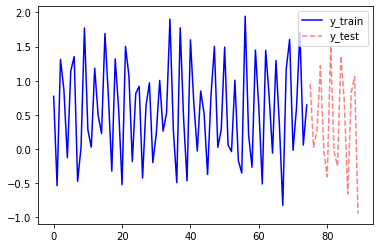

In [26]:
idx_train = np.arange(75)
idx_test = np.arange(75, 90)

plt.plot(idx_train, y_train, color = 'blue', label = 'y_train')
plt.plot(idx_test, y_test, color = 'red', linestyle = '--', alpha = 0.5, label = 'y_test')
plt.legend(loc = 'upper right')
plt.show()

In [27]:
model = Sequential()
model.add(SimpleRNN(12, input_shape = (10, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss ='mse')
model.fit(X_train, y_train, epochs = 400, verbose = 0)

In [28]:
y_predictions = model.predict(X_test)

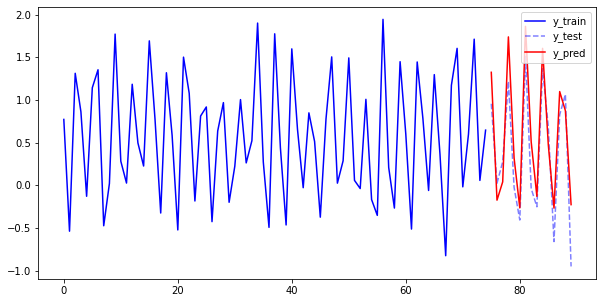

In [29]:
idx_train = np.arange(75)
idx_test = np.arange(75, 90)
plt.figure(figsize = (10, 5))
plt.plot(idx_train, y_train, color = 'blue', label = 'y_train')
plt.plot(idx_test, y_test, color = 'blue', linestyle = '--', alpha = 0.5, label = 'y_test')
plt.plot(idx_test, y_predictions, color = 'red', label = 'y_pred')
plt.legend(loc = 'upper right')
plt.show()